# Problem Statement : Identify either note is Genuine or not using predictive modelling and with the help of Decision tree

# 1. Import Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , precision_score ,recall_score , f1_score , classification_report

# 2. Data Collection / Import Dataset

In [2]:
df = pd.read_csv('E:/ML_Datasets/banknotes.csv')

In [3]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# 3.Exploratory Data Analysis

## 1.Head

In [4]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## 2.Tail

In [5]:
df.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


## 3.shape

In [6]:
df.shape

(1372, 5)

## 4.size

In [7]:
df.size

6860

## 5.columns

In [8]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

## 6. Info

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## 7.dtypes

In [10]:
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

# 8.check missing values

In [11]:
df.isna().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

## 9.check duplicate value

In [12]:
df.duplicated().sum()

24

In [13]:
df[df.duplicated()]

,Variance,Skewness,Curtosis,Entropy,Class
47,-0.7869,9.5663,-3.7867,-7.5034,0
139,-0.2062,9.2207,-3.7044,-6.8103,0
190,0.9297,-3.7971,4.6429,-0.2957,0
195,-1.8584,7.8860,-1.6643,-1.8384,0
226,0.5706,-0.0248,1.2421,-0.5621,0
268,0.9297,-3.7971,4.6429,-0.2957,0
284,-1.3000,10.2678,-2.9530,-5.8638,0
300,0.3292,-4.4552,4.5718,-0.9888,0
315,0.3292,-4.4552,4.5718,-0.9888,0
320,0.5195,-3.2633,3.0895,-0.9849,0


## 10. skewness

In [14]:
df.skew()

Variance   -0.149388
Skewness   -0.394103
Curtosis    1.088569
Entropy    -1.022243
Class       0.223191
dtype: float64

## 11. describe

In [15]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## 12.correleation

In [16]:
df.corr()

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


<AxesSubplot:>

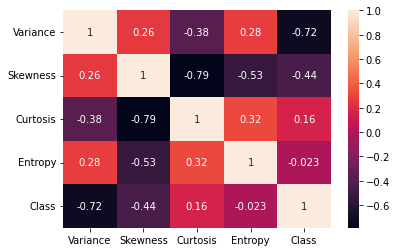

In [17]:
sns.heatmap(df.corr() , annot = True)

## 13. Unique values

In [18]:
unique = df['Class'].value_counts().index

In [19]:
unique

Int64Index([0, 1], dtype='int64')

# 4.Data Visualisation

## 1.Countplot

In [20]:
df['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

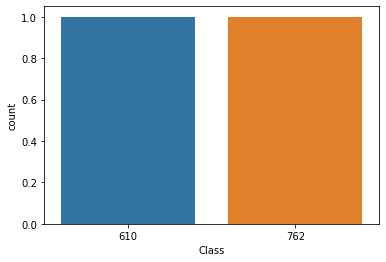

In [21]:
sns.countplot(df['Class'].value_counts())

## 2. Pie plot

In [22]:
labels = df['Class'].value_counts().index

In [23]:
labels 

Int64Index([0, 1], dtype='int64')

In [24]:
value = df['Class'].value_counts().values

In [25]:
value

array([762, 610], dtype=int64)

([<matplotlib.patches.Wedge at 0x1bdc0708ca0>,
 [Text(-0.22509111856951264, 1.280364787215396, '0'),
  Text(0.2250911185695125, -1.280364787215396, '1')],
 [Text(-0.13851761142739238, 0.7879167921325512, ' 56%'),
  Text(0.1385176114273923, -0.7879167921325512, ' 44%')])

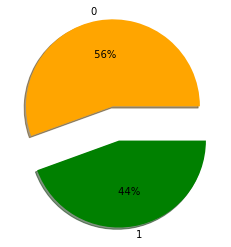

In [26]:
plt.pie(value,
    explode=(0.2 , 0.2),
    labels=labels,
    colors=['orange','green'],
    autopct='% 1.0f%%',
    pctdistance=0.6,
    shadow=True,
    labeldistance=1.1,
    startangle=0,
    radius=1,
    counterclock=True,
    wedgeprops=None,
    textprops=None,
    center=(0, 0),
    frame=False,
    rotatelabels=False)

## 3.Pairplot

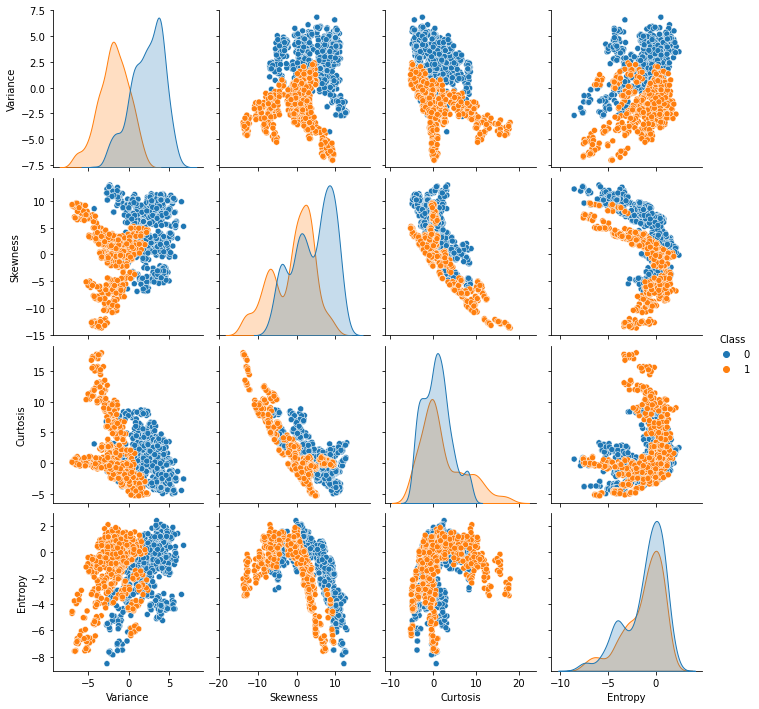

In [27]:
sns.pairplot(df , hue = 'Class')

## 4.Histplot

array([[<AxesSubplot:title={'center':'Variance'}>,
        <AxesSubplot:title={'center':'Skewness'}>],
       [<AxesSubplot:title={'center':'Curtosis'}>,
        <AxesSubplot:title={'center':'Entropy'}>],
       [<AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

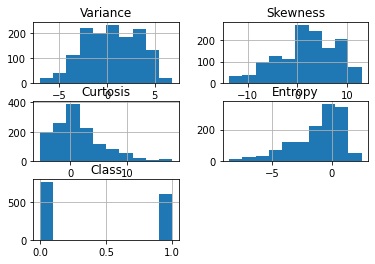

In [28]:
df.hist()

<AxesSubplot:xlabel='Variance', ylabel='Count'>

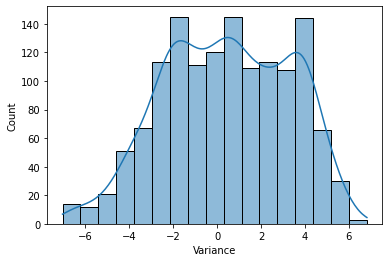

In [29]:
sns.histplot(df['Variance'] , kde = True)

<AxesSubplot:xlabel='Skewness', ylabel='Count'>

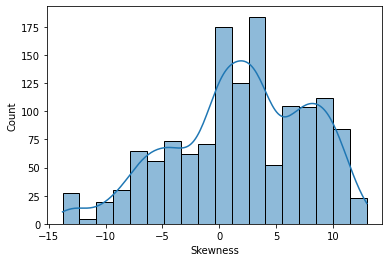

In [30]:
sns.histplot(df['Skewness'] , kde = True)

<AxesSubplot:xlabel='Curtosis', ylabel='Count'>

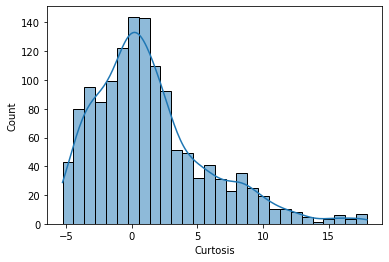

In [31]:
sns.histplot(df['Curtosis'] , kde = True)

<AxesSubplot:xlabel='Entropy', ylabel='Count'>

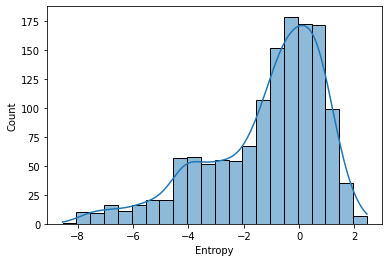

In [32]:
sns.histplot(df['Entropy'] , kde = True)

<AxesSubplot:xlabel='Class', ylabel='Count'>

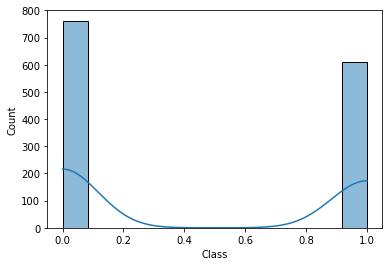

In [33]:
sns.histplot(df['Class'] , kde = True)

## 5.Boxplot

<AxesSubplot:>

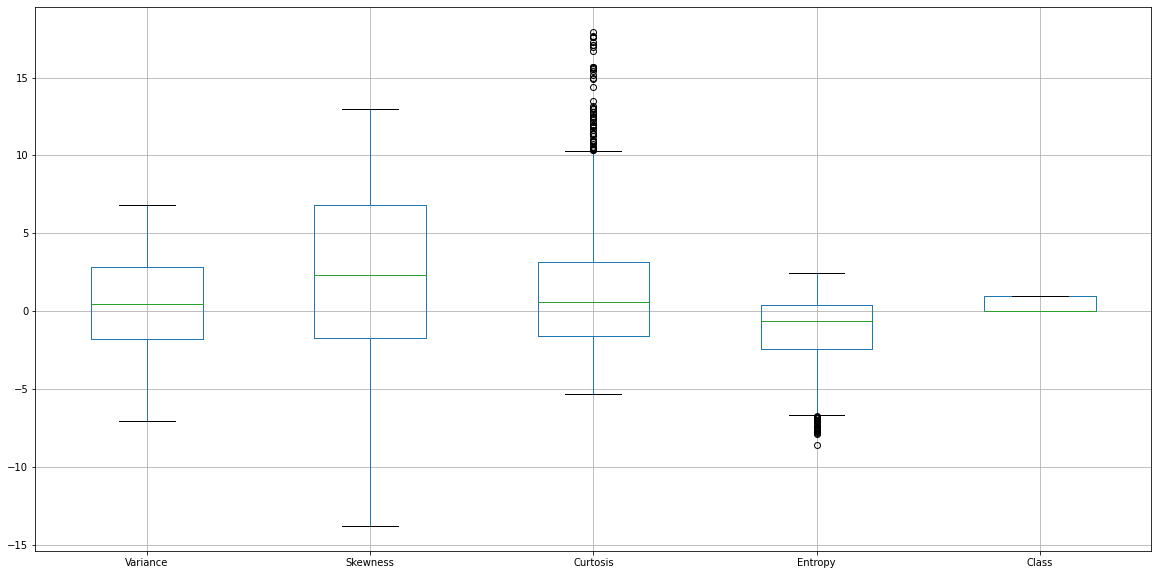

In [34]:
plt.figure(figsize = (20 , 10))
df.boxplot()

### How to treate the outliers

### 1. Visualisation

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Curtosis'>

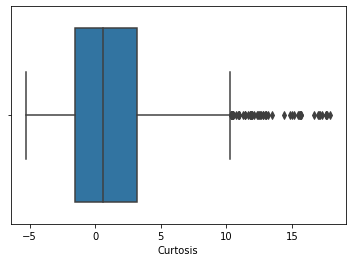

In [35]:
sns.boxplot(df['Curtosis'])

### 2. skewness

In [36]:
print('Skewness of curtosis is :' , df['Curtosis'].skew())

Skewness of curtosis is : 1.088568543275335


### 3.IQR : Interquartile range

In [37]:
Q1 = np.percentile(df['Curtosis'] , 25 , interpolation = 'midpoint')
Q2 = np.percentile(df['Curtosis'] , 50 , interpolation = 'midpoint')
Q3 = np.percentile(df['Curtosis'] , 75 , interpolation = 'midpoint')


print('Q1 is :' , Q1)
print('Q2 is :' , Q2)
print('Q3 is :' , Q3)

IQR  = Q3 = Q1

print('IQR of Curtosis is :' , IQR)

whisker_width = 1.5


low_lim = Q1 - (whisker_width * IQR)
high_lim = Q3 - (whisker_width * IQR)


print('minimum value of curtosis is :' , low_lim)
print('maximum vakue of curtosis is :' , high_lim)

index = df[(df['Curtosis'] > high_lim) | (df['Curtosis'] < low_lim).index]

print(index)

Q1 is : -1.59275
Q2 is : 0.61663
Q3 is : 3.1816
IQR of Curtosis is : -1.59275
minimum value of curtosis is : 0.7963749999999998
maximum vakue of curtosis is : 0.7963749999999998
      Variance  Skewness  Curtosis  Entropy  Class
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
5      4.36840   9.67180   -3.9606 -3.16250      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1371 rows x 5 columns]


### How to treate ouliers of Entropy

#### 1. Visualization

C:\Users\Pritam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Entropy'>

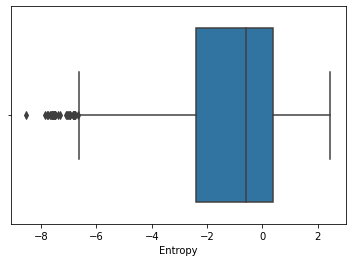

In [38]:
sns.boxplot(df['Entropy'])

#### 2.Skewness

In [39]:
print('Skewness of Entropy is :' , df['Entropy'].skew())

Skewness of Entropy is : -1.0222430438083978


#### 3. IQR : InterQuartile range

In [40]:
Q1 = np.percentile(df['Entropy'] , 25 , interpolation = 'midpoint')
Q2 = np.percentile(df['Entropy'] , 50 , interpolation = 'midpoint')
Q3 = np.percentile(df['Entropy'] , 75 , interpolation = 'midpoint')


print('Q1 is :' , Q1)
print('Q2 is :' , Q2)
print('Q3 is :' , Q3)

IQR  = Q3 = Q1


print('IQR od Entropy is :' , IQR)

whisker_width = 1.5


low_lim = Q1 - (whisker_width * IQR)
high_lim = Q3 - (whisker_width * IQR)


print('minimum value of curtosis is :' , low_lim)
print('maximum vakue of curtosis is :' , high_lim)

index = df[(df['Curtosis'] > high_lim) | (df['Curtosis'] < low_lim).index]

print(index)

Q1 is : -2.417
Q2 is : -0.58665
Q3 is : 0.39481
IQR od Entropy is : -2.417
minimum value of curtosis is : 1.2085
maximum vakue of curtosis is : 1.2085
      Variance  Skewness  Curtosis  Entropy  Class
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
5      4.36840   9.67180   -3.9606 -3.16250      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1371 rows x 5 columns]


# 5.Data Preprocessing

### 1. Data split into independent and dependent variable

In [41]:
x = df.drop(labels = 'Class' , axis = 1)
y = df.loc[: , 'Class']

In [42]:
x.head(2)

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [43]:
y.head(2)

0    0
1    0
Name: Class, dtype: int64

#### 2. Data split into train and test

In [44]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

# 6.Building Model

In [45]:
model = DecisionTreeClassifier(criterion = 'entropy')

#### Fit the training data

In [46]:
model.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

#### Training Accuaracy

In [47]:
training_accuracy = model.score(x_train , y_train)

In [48]:
training_accuracy

1.0

#### Testing Accuracy

In [49]:
testing_accuracy = model.score(x_test , y_test)

In [50]:
testing_accuracy

0.9818181818181818

### Prediction_output

In [51]:
y_pred  = model.predict(x_test)

In [52]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

### Text Representation of decision Tree

In [53]:
text_representation = tree.export_text(model , feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'] )
print(text_representation)

|--- Variance <= 0.32
|   |--- Skewness <= 5.87
|   |   |--- Curtosis <= 3.06
|   |   |   |--- class: 1
|   |   |--- Curtosis >  3.06
|   |   |   |--- Skewness <= -1.82
|   |   |   |   |--- Variance <= -0.65
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Variance >  -0.65
|   |   |   |   |   |--- Curtosis <= 7.53
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Curtosis >  7.53
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Skewness >  -1.82
|   |   |   |   |--- Variance <= -2.16
|   |   |   |   |   |--- Entropy <= -0.20
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Entropy >  -0.20
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Variance >  -2.16
|   |   |   |   |   |--- class: 0
|   |--- Skewness >  5.87
|   |   |--- Variance <= -3.44
|   |   |   |--- Curtosis <= 2.11
|   |   |   |   |--- class: 1
|   |   |   |--- Curtosis >  2.11
|   |   |   |   |--- class: 0
|   |   |--- Variance >  -3.44
|   |   |   |--- class: 0
|--- Varia

### Plot the DecisionTree

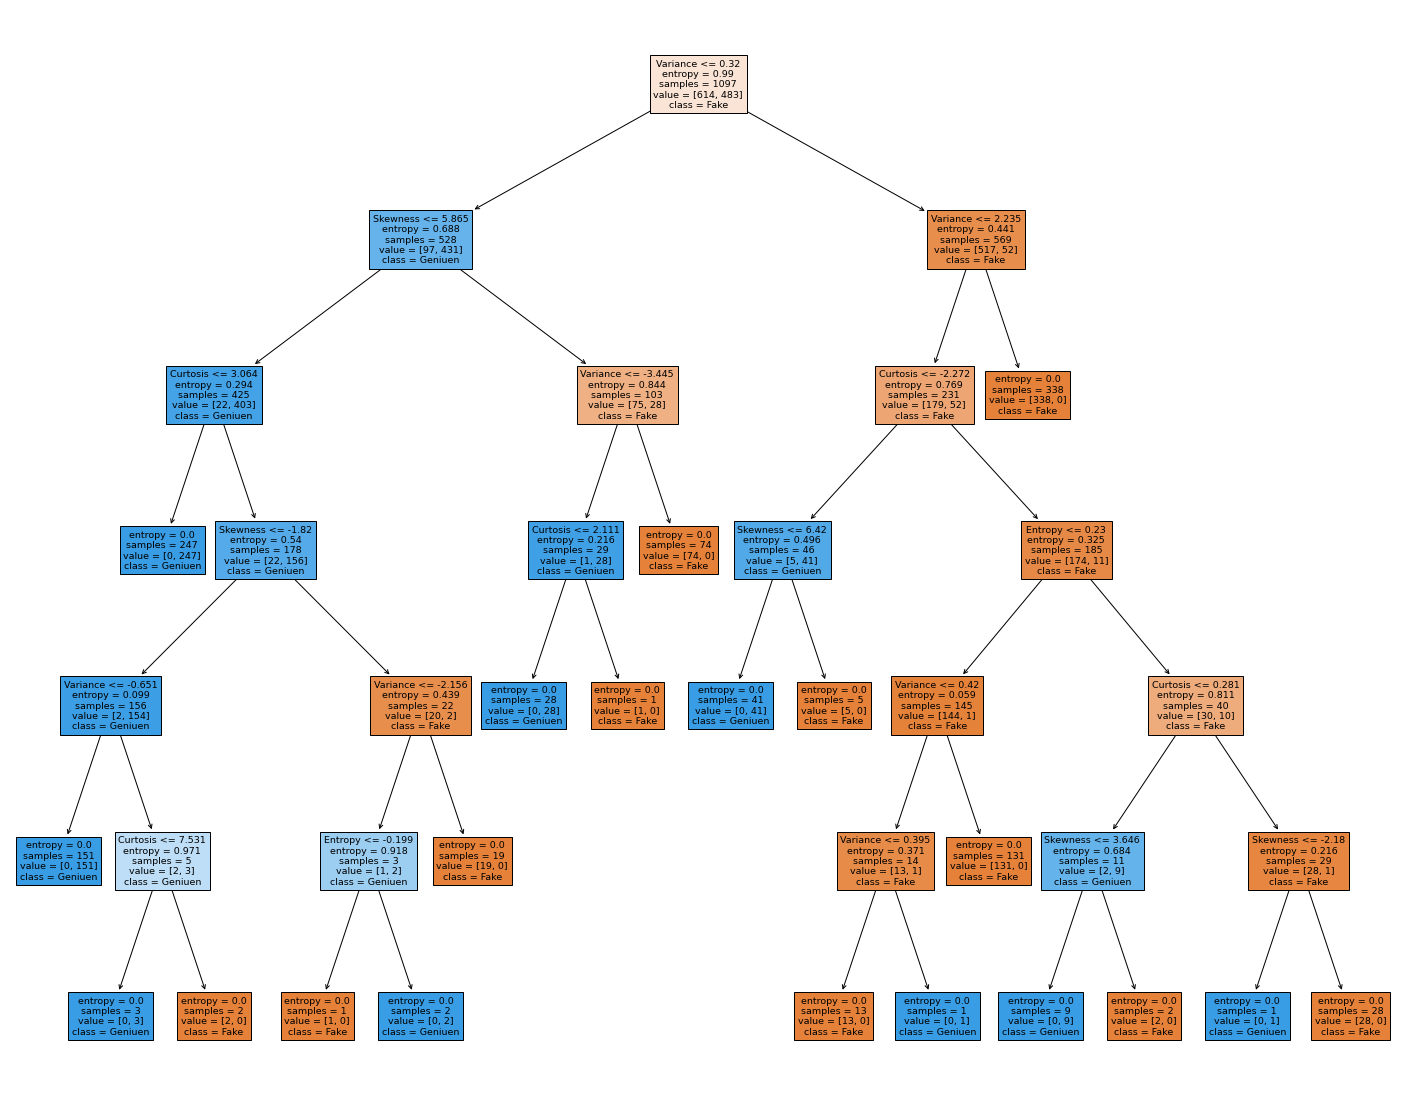

In [54]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'],  
                   class_names=['Fake' , 'Geniuen'],
                   filled=True)

plt.savefig('sample_DT' )

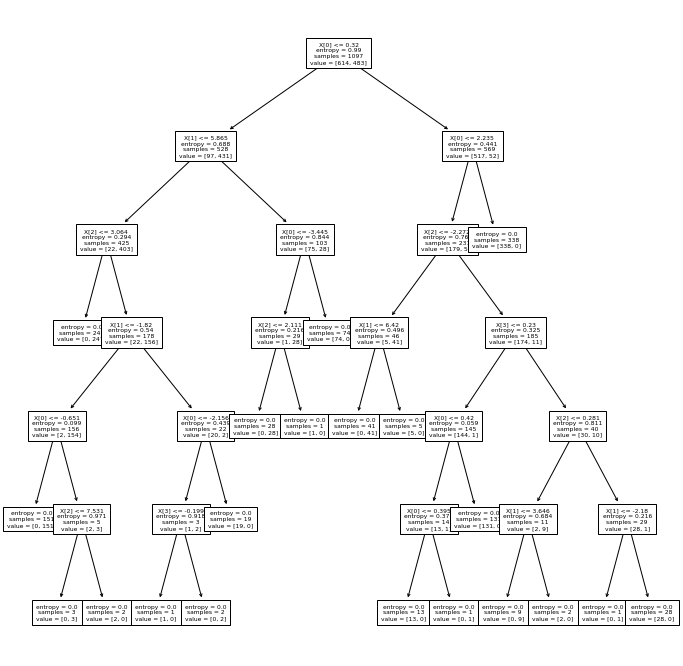

In [58]:
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

# 7. Performance Matrix or cost function

### 1.Confusion matrix

In [60]:
cm = confusion_matrix(y_test , y_pred)

In [61]:
cm 

array([[147,   1],
       [  4, 123]], dtype=int64)

<AxesSubplot:>

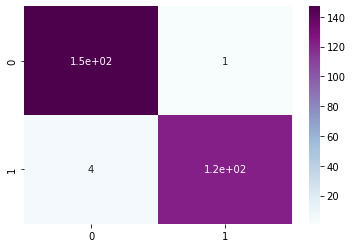

In [86]:
sns.heatmap(cm ,
    vmin=None,
    vmax=None,
    cmap='BuPu',
    center=None,
    robust=False,
    annot=True,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels=unique,
    yticklabels=unique,
    mask=None,
    ax=None)

### 2.Precision Score

In [70]:
precision_score(y_test , y_pred , average = 'macro')

0.9827227088229011

### 3. Recall Score

In [71]:
recall_score(y_test , y_pred , average = 'macro')

0.9808735901255585

### 4.F1 Score

In [72]:
f1_score(y_test , y_pred , average = 'macro')

0.9816786366240723

### 5.Classification report

In [74]:
print(classification_report(y_test  , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       148
           1       0.99      0.97      0.98       127

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



# 8.prediction output probability score

In [76]:
y_pred_prob = model.predict_proba(x_test)

In [84]:
y_pred_prob_df = pd.DataFrame(y_pred_prob , columns =['prediction_probability_score:0','prediction_probability_score:1'])

In [85]:
y_pred_prob_df

,prediction_probability_score:0,prediction_probability_score:1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
270,0.0,1.0
271,0.0,1.0
272,1.0,0.0
273,1.0,0.0
